## Full Article on Medium: https://allysonf.medium.com/predict-red-wine-quality-with-svc-decision-tree-and-random-forest-24f83b5f3408

## Link To Github Repo: https://github.com/Jingyi0321/Wine-Quality-Prediction-Project-Classification-Models

# Import the Data:


In [ ]:
import pandas as pd
pd.set_option("display.max_columns", None)
df = pd.read_csv("winequality-red.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Wrangling:

Deal with missing values:


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Exploration:

Correlation Matrix:

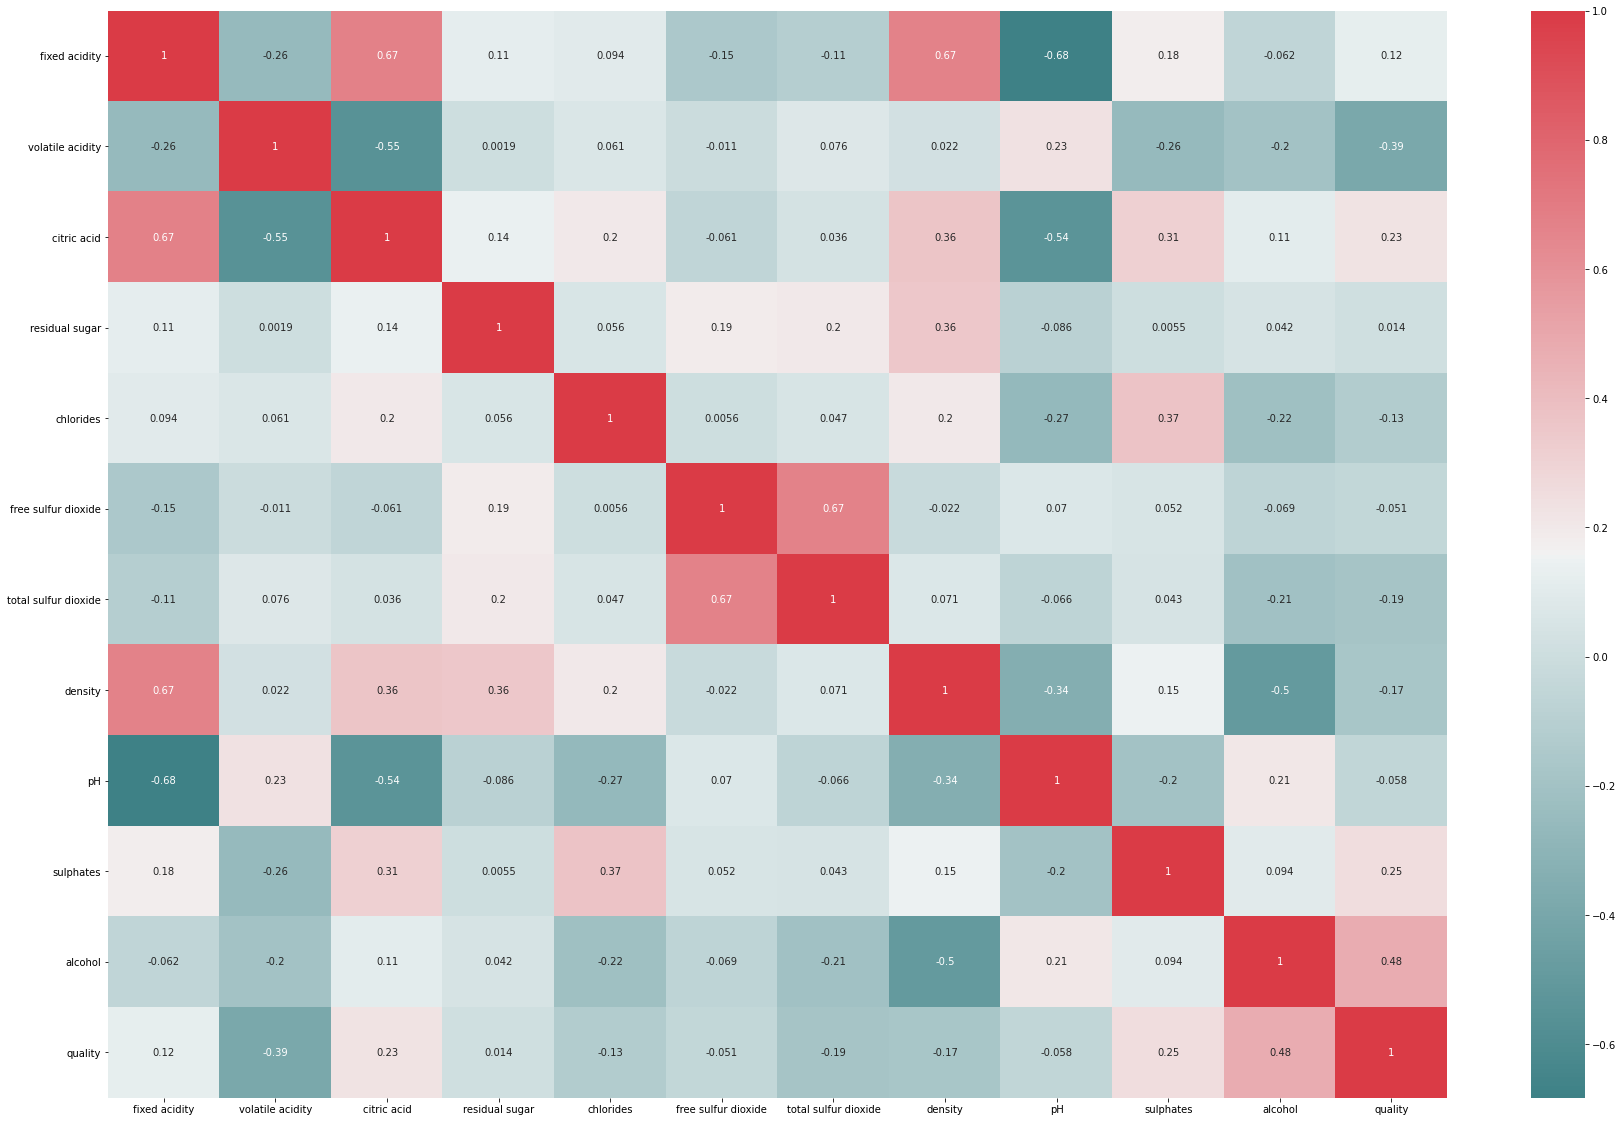

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
corr = df.corr()
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

Alcohol v.s. Quality

No handles with labels found to put in legend.


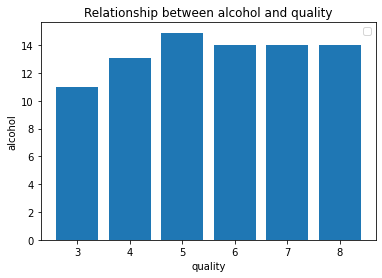

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

#Guiding Question:

### What are the top 3 important properties that can make a wine good?

# Prepare the Data for Classification Model:

Normalize the data:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
normal_df = scaler.fit_transform(df)
normal_df = pd.DataFrame(normal_df, columns = df.columns)
print(normal_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

Convert the dataset to a Classification Problem:

In [ ]:
df["good wine"] = ["yes" if i >= 7 else "no" for i in df['quality']]

create features X and target variable y:

In [ ]:
X = normal_df.drop(["quality"], axis = 1)
y = df["good wine"]

Imbalance in Data:

In [ ]:
y.value_counts()

no     1382
yes     217
Name: good wine, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


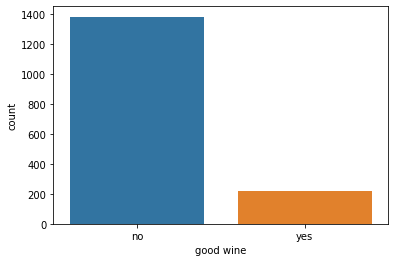

In [ ]:
sns.countplot(y)
plt.show()

# Modeling:

Partition X and y into training and testing dataset:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

### Baseline Classification:

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state = 2020) 
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)

print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


### Method One: Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=2020)
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=2020, shrinking=True,
    tol=0.001, verbose=False)

print the accuracy score on the test data

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print("SVM Accuracy = ", metrics.accuracy_score(y_test, y_pred))

SVM Accuracy =  0.8854166666666666


no overfitting 

In [ ]:
y_pred_train = svc.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8927613941018767


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8642927115987462


cross validation to fine tune the parameters

try out a wide range of values for C:

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc,random_grid,cv=5,random_state=2020)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'C': 1}


Random search allowed us to narrow down the range for C. Now, we can do an exhaustive search on C within range [0.8,1.4].

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_dist = {'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train,y_train)

print(svc_cv.best_params_)

{'C': 1.3, 'kernel': 'rbf'}


In [ ]:
svc_new = SVC(C = 1.3, kernel = "rbf", random_state = 2020)
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.89375


###Model Two: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2020)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

Plot the confusion matrix and print the accuracy on the test data

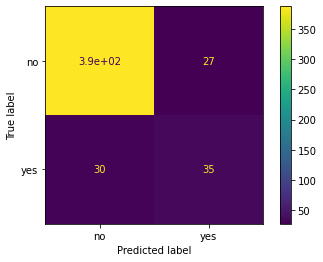

0.88125


In [ ]:
from sklearn.metrics import plot_confusion_matrix
y_pred = dt.predict(X_test)
metrics.plot_confusion_matrix(dt, X_test, y_test)
plt.show()

print(metrics.accuracy_score(y_test, y_pred))

Display the Decision Tree

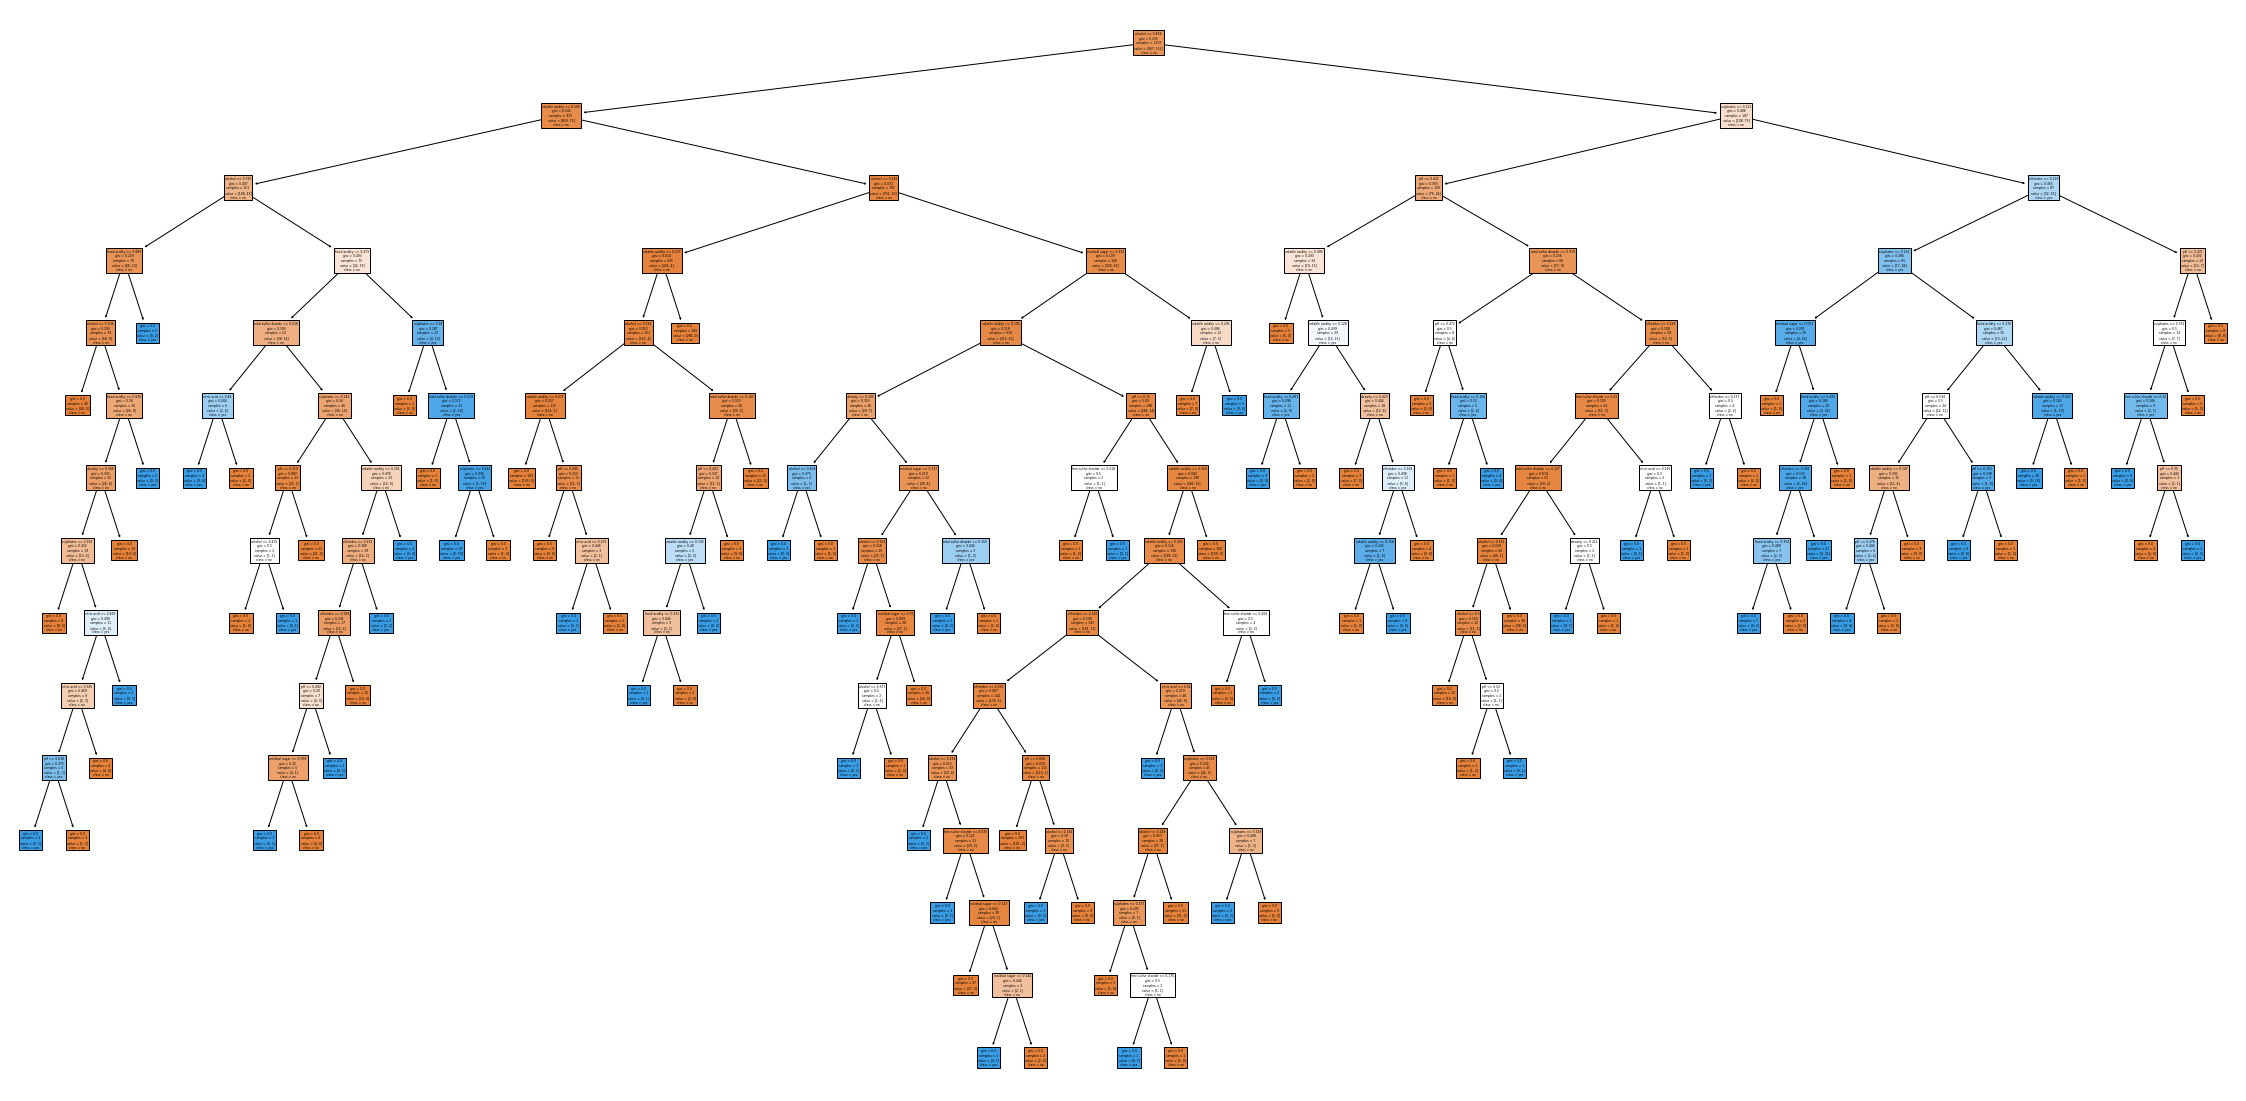

In [ ]:
from sklearn import tree
plt.figure(figsize=(40,20))
fn = X.columns
cn = y.unique()
tree.plot_tree(dt, feature_names=fn, class_names=cn, filled=True)
plt.show()

overfitting...

In [ ]:
scores = cross_val_score(dt, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8054917711598746


In [ ]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [ ]:
print(dt.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 2020, 'splitter': 'best'}


fine tune the hyperparameter by using GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_dist = {"max_depth": range(1,6),
              "max_features": range(1,10),
              "criterion": ["gini", "entropy"]}
dt_cv = GridSearchCV(dt, param_dist, cv=5)
dt_cv.fit(X_train,y_train)

print(dt_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_features': 8}


Pruning Parameters: max_depth and max_features

In [ ]:
dt_new = DecisionTreeClassifier(criterion = "gini", 
                                max_depth = 2,
                                max_features = 8,
                                random_state = 2020)
dt_new.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=8, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2020, splitter='best')

print the accuracy on the test data

In [ ]:
y_pred_new = dt_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.8854166666666666


In [ ]:
scores = cross_val_score(dt_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8786794670846394


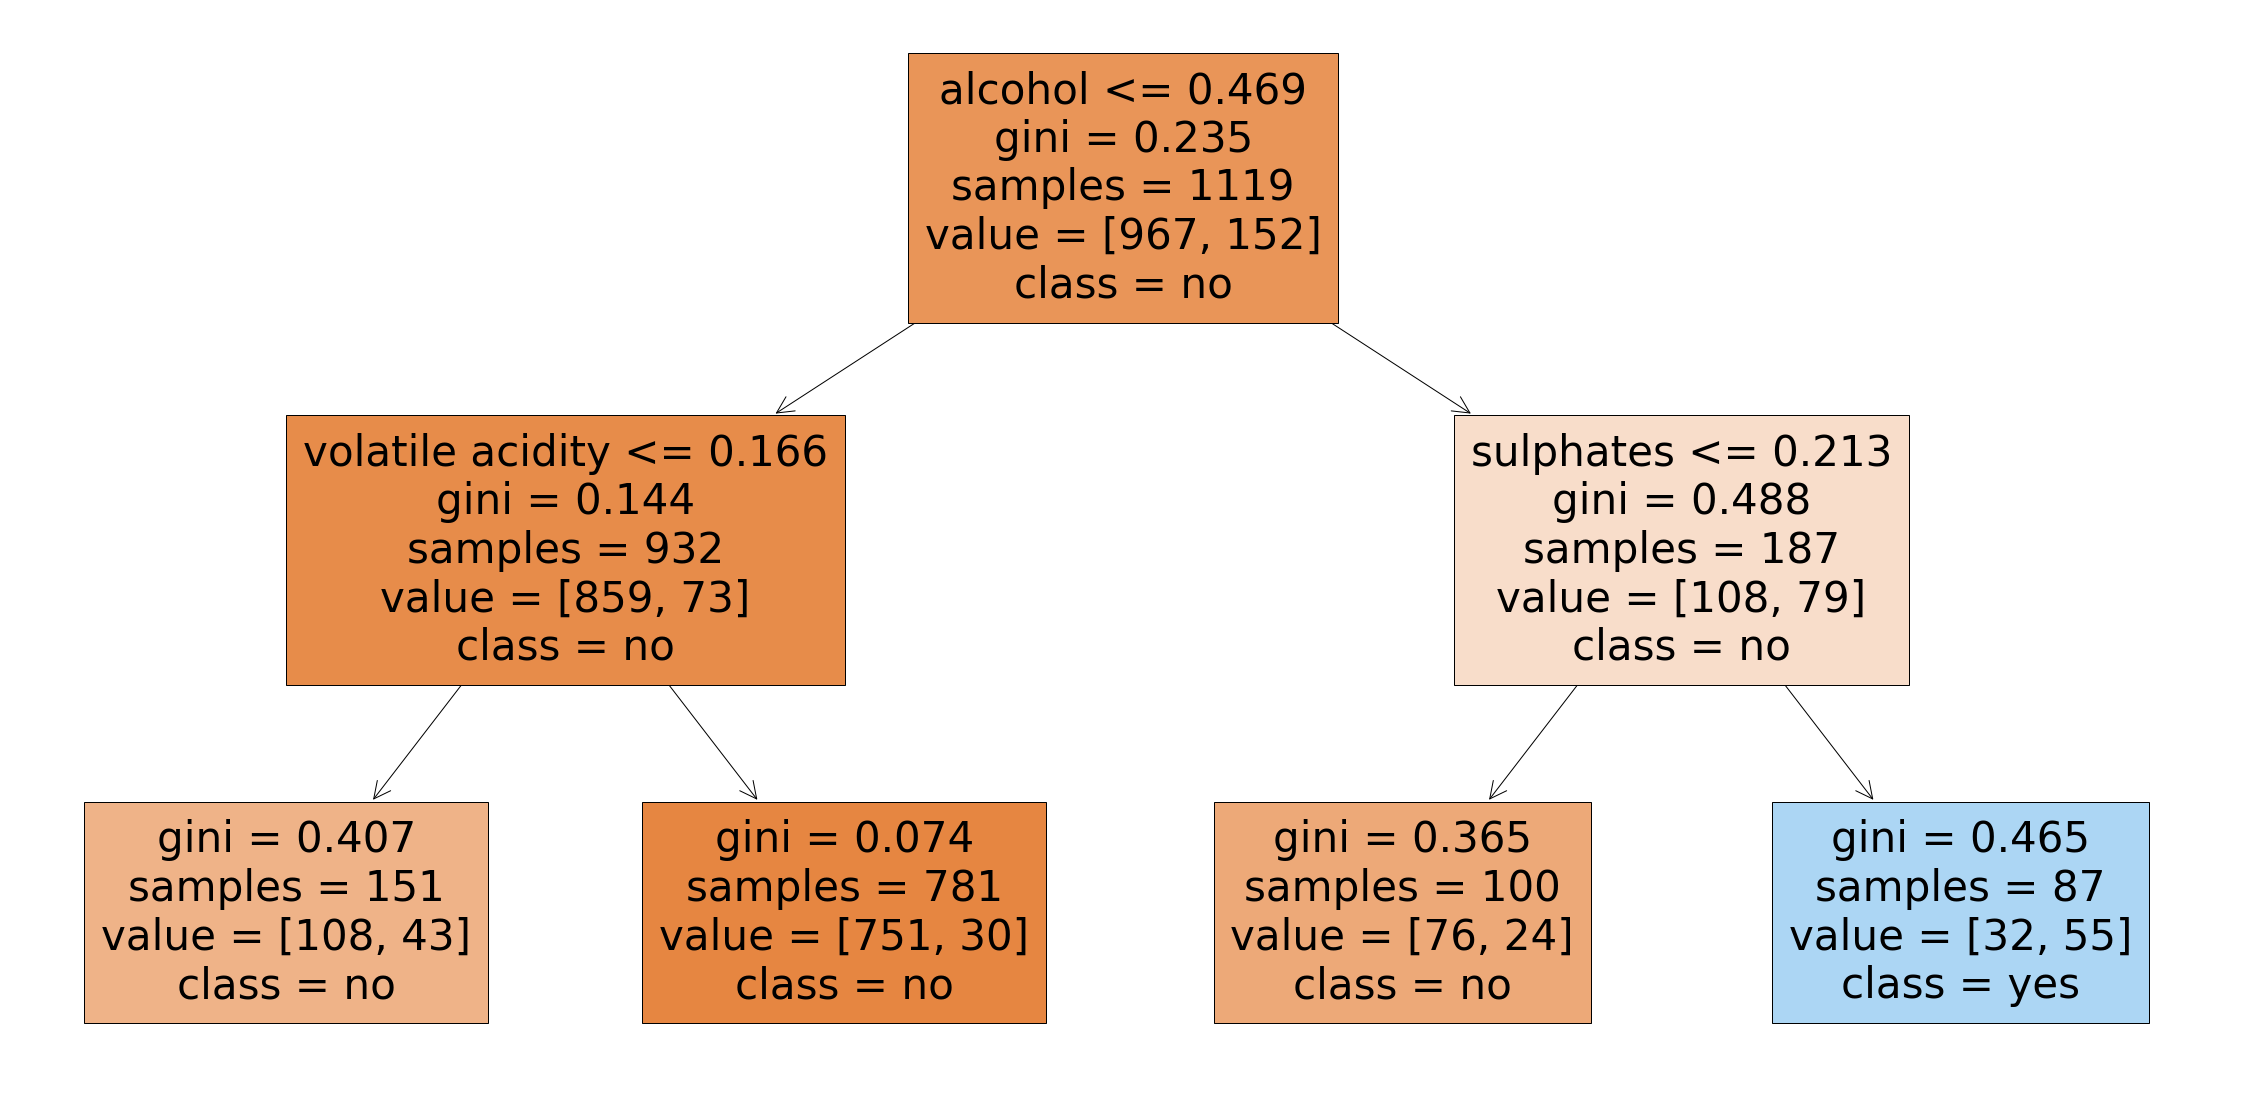

In [ ]:
plt.figure(figsize=(40,20))
tree.plot_tree(dt_new, feature_names=fn, class_names=cn, filled=True)
plt.show()

### Method Three: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


overfitting...

In [ ]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.8680466300940439


In [ ]:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [ ]:
print(rf_model.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


try out a wide range of values for max depth and n_estimators by using RandomizedSearchCV

In [ ]:
random_grid = {'max_depth': [1, 5, 10, 15], 
               'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


{'n_estimators': 300, 'max_depth': 10}


fine tune the hyperparameter by using GridSearch

In [ ]:
param_dist = {"max_depth":[7,8,9,10,11,12,13,14,15],
              "n_estimators":[280,300,320,350,380,400,420,450,480]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)

print(rf_cv.best_params_)

{'max_depth': 14, 'n_estimators': 450}


In [ ]:
rf_new = RandomForestClassifier(n_estimators = 450, max_depth =  14, random_state = 2020)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [ ]:
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Cross Validation Score:  0.868669670846395


# 3 Most Important Features:

Calculate the top 3 important features

In [ ]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.162224
volatile acidity,0.130491
sulphates,0.112694
density,0.096320
citric acid,0.093280


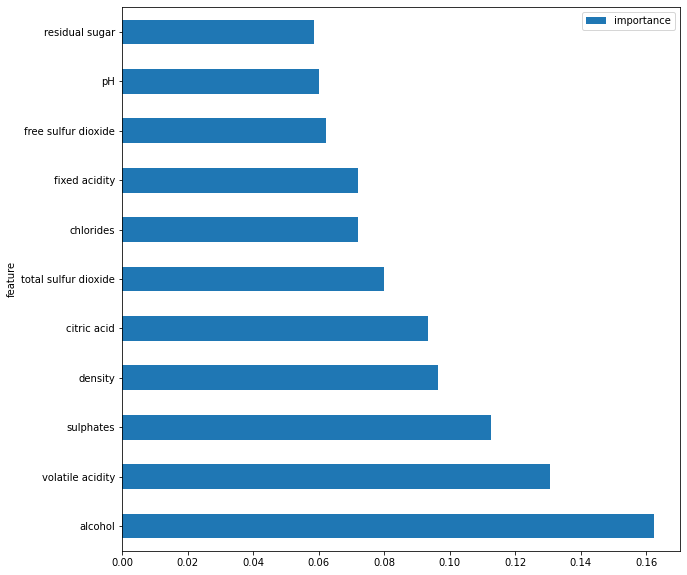

In [ ]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()

In [ ]:
import numpy as np
print(np.average(df[df["good wine"] == "yes"].alcohol))
print(np.average(df[df["good wine"] == "no"].alcohol))

11.518049155145931
10.251037144235408


**wines in good quality have higher levels of alcohol on average**

In [ ]:
print(np.average(df[df["good wine"] == "yes"].sulphates))
print(np.average(df[df["good wine"] == "no"].sulphates))

0.7434562211981566
0.6447539797395079


**wines in good quality have higher levels of sulphates on average**

In [ ]:
df_good = df[df["good wine"] == "yes"]
df_bad = df[df["good wine"] == "no"]
print(np.average(df_good["volatile acidity"]))
print(np.average(df_bad["volatile acidity"]))

0.4055299539170507
0.5470224312590448


**wines in good quality have lower levels of volatile acidity on average**